In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from helpers import loadData, loadDataFromPath

In [3]:
# Load data
X_tr, y_tr = loadData("train")
X_te, y_te = loadData("test")


In [4]:
# Build model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
# Train model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_tr, y_tr, epochs=10, 
                    validation_data=(X_te, y_te))

Epoch 1/10
2290/2290 [==============================] - 32s 14ms/step - loss: 0.9581 - accuracy: 0.6890 - val_loss: 0.5606 - val_accuracy: 0.8421
Epoch 2/10
2290/2290 [==============================] - 31s 13ms/step - loss: 0.4519 - accuracy: 0.8685 - val_loss: 0.4897 - val_accuracy: 0.8603
Epoch 3/10
2290/2290 [==============================] - 31s 14ms/step - loss: 0.3851 - accuracy: 0.8881 - val_loss: 0.4181 - val_accuracy: 0.8804
Epoch 4/10
2290/2290 [==============================] - 31s 14ms/step - loss: 0.3364 - accuracy: 0.9010 - val_loss: 0.3882 - val_accuracy: 0.8908
Epoch 5/10
2290/2290 [==============================] - 31s 13ms/step - loss: 0.3069 - accuracy: 0.9090 - val_loss: 0.4018 - val_accuracy: 0.8854
Epoch 6/10
2290/2290 [==============================] - 32s 14ms/step - loss: 0.2822 - accuracy: 0.9172 - val_loss: 0.3787 - val_accuracy: 0.8942
Epoch 7/10
2290/2290 [==============================] - 32s 14ms/step - loss: 0.2588 - accuracy: 0.9243 - val_loss: 0.3648 -

814/814 - 3s - loss: 0.3893 - accuracy: 0.8947 - 3s/epoch - 4ms/step
Test accuracy: 0.8946681022644043


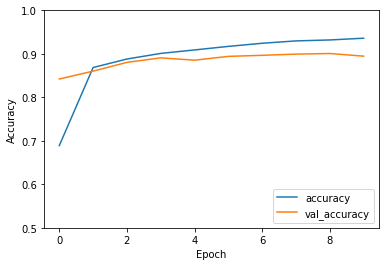

In [7]:
# Evaluate model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_te,  y_te, verbose=2)
print("Test accuracy: {}".format(test_acc))